## k 최근접 이웃 알고리즘
+ 머신러닝 분류에 자주 사용되는 대표 알고리즘

+ 얼굴인식, 개인영화추천, 질병 유전자 패턴 식별에 활용

#### KNN의 K는 가장 가까운 이웃 '하나'가 아니고 훈련데이터 중 새로운 데이터와 가장 가까운 K개의 이웃을 찾는다는 의미


#### 즉, 하나의 관측값은 거리가 가까운 k개의 이웃 관측값과 비슷한 특성을 갖는다고 가정함
+  따라서, k개의 이웃의 목표변수 중 다수결로 가장 많은 범주에 속한 값을 결과로 반환

#### KNN 알고리즘에서는 k를 얼마나 설정하느냐에 따라 결과와 성능이 달라짐

+ k가 작으면 데이터의 범위가 좁아짐 - 과적합 위험
+ k가 크면 데이터의 범위가 넓어짐 - 일반화 위험
+ 일반적으로 k값은 데이터 총 건수에 제곱근을 씌운 값

<img src='img/knn.png'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mldlpy3

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### 데이터 적재 및 분할

In [3]:
iris = load_iris()

In [4]:
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target, test_size=0.3, stratify = iris.target, random_state=2111121455)

#### knn 분석 1

In [6]:
knc = KNeighborsClassifier(n_neighbors = 1)
knc.fit(Xtrain, ytrain)
pred = knc.predict(Xtest)
knc.score(Xtrain, ytrain), accuracy_score(pred, ytest)

(1.0, 0.9333333333333333)

#### knn 분석 2

In [7]:
knc = KNeighborsClassifier(n_neighbors = 2)
knc.fit(Xtrain, ytrain)
pred = knc.predict(Xtest)
knc.score(Xtrain, ytrain), accuracy_score(pred, ytest)

(0.9809523809523809, 0.9333333333333333)

#### knn 분석 2

In [9]:
knc = KNeighborsClassifier(n_neighbors = 3)
knc.fit(Xtrain, ytrain)
pred = knc.predict(Xtest)
knc.score(Xtrain, ytrain), accuracy_score(pred, ytest)

(0.9809523809523809, 0.9333333333333333)

#### 최적의 k값을 찾기 위해 교차검증 실시

In [13]:
scores = []
for k in range(1, 30+1):
    knc = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knc, Xtrain, ytrain, cv=10, scoring='accuracy')
    scores.append(score.mean())

ValueError: n_splits=5 cannot be greater than the number of members in each class.

#### 결과 시각화

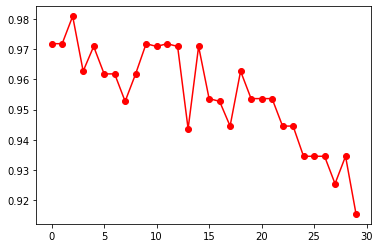

In [14]:
plt.plot(scores, 'ro-')

In [64]:
plt.rc('font', family='NanumGothic')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus']=False

#### K값 선택기준
+ k값에 따라 정확도가 점점 줄다가 어느 순간 확 주는 지점이 생기는데 그래프에서는 가늠하기 어려움
+ 자주 나타나는 정확도 지표 중 선두에 나오는 지점
+ 너무 높은 정확도는 과적합의 위험이 있기 때문에 주의

#### KNN 알고리즘을 이용하여 당도, 아삭함을 기준으로 과일/채소/단백질을 구분함
+ 당도 6, 아삭함 4인 토마토는 과일인가 채소인가?

In [65]:
fresh = pd.read_csv('data/fresh.csv', encoding = 'euc-kr')

In [66]:
fresh.columns = ['name','sweet','crunchy','class']

<AxesSubplot:xlabel='class', ylabel='count'>

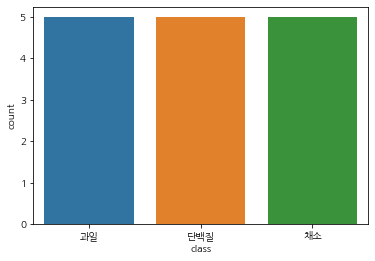

In [67]:
sns.countplot(x='class', data=fresh)

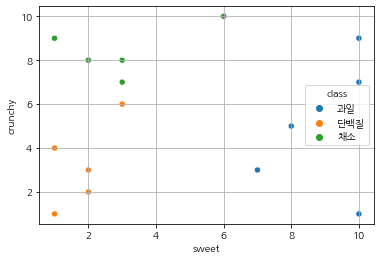

In [68]:
sns.scatterplot(x='sweet', y='crunchy', data=fresh, hue='class')
plt.grid()

#### 데이터 전처리

In [69]:
fresh['target'] = pd.Categorical(fresh['class'])
fresh['target'] = fresh['target'].cat.codes
fresh.head()

,name,sweet,crunchy,class,target
0,포도,8,5,과일,0
1,생선,2,2,단백질,1
2,당근,6,10,채소,2
3,오렌지,7,3,과일,0
4,샐러리,3,8,채소,2


#### 데이터 분리

In [70]:
data = fresh.iloc[:, 1:3]
target = fresh.target

#### 교차검증으로 적절한 k 알아내기

In [77]:
scores = []
for k in range(1, 10+1):
    knc = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knc, data, target, cv=5, scoring='accuracy')
    scores.append(score.mean())

/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier 

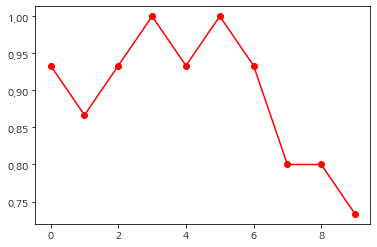

In [78]:
plt.plot(scores, 'ro-')

#### 채택된 k값으로 모델 생성

In [83]:
knc = KNeighborsClassifier(n_neighbors = 10)
knc.fit(data, target)
knc.score(data, target)

/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.8

#### 당도 6, 아삭함 4인 토마토는 과일인가 채소인가?

In [84]:
newOne = np.array([[6,4]])
pred = knc.predict(newOne)
pred

/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int8)

In [85]:
newOne = np.array([[4,6]])
pred = knc.predict(newOne)
pred

/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([2], dtype=int8)


### 농구선수 게임데이터를 이용해서 포지션 예측

+ 2017 NBA 농구선수의 실제 데이터를 참고

#### player 선수명, pos 포지션, 3p 3점슛 성공횟수,
#### 2p 2점슛 성공횟수, TRB 리바운드 성공횟수, 
#### STL 스틸 성공횟수, BLK 블로킹 성공횟수

#### SG 슈팅가드(장거리 슛터), AST 어시스트 성공횟수, 
#### C 센터 (골대 근처 블로킹,스틸,리바운드 전문)



#### SG 슈팅가드(장거리 슈터)와 C센터(골대 근처 블로킹, 스틸, 리바운드 전문)을 구분하는 모델 생성

In [121]:
stat = pd.read_csv('data/basketball_stat.csv')

#### 시각화

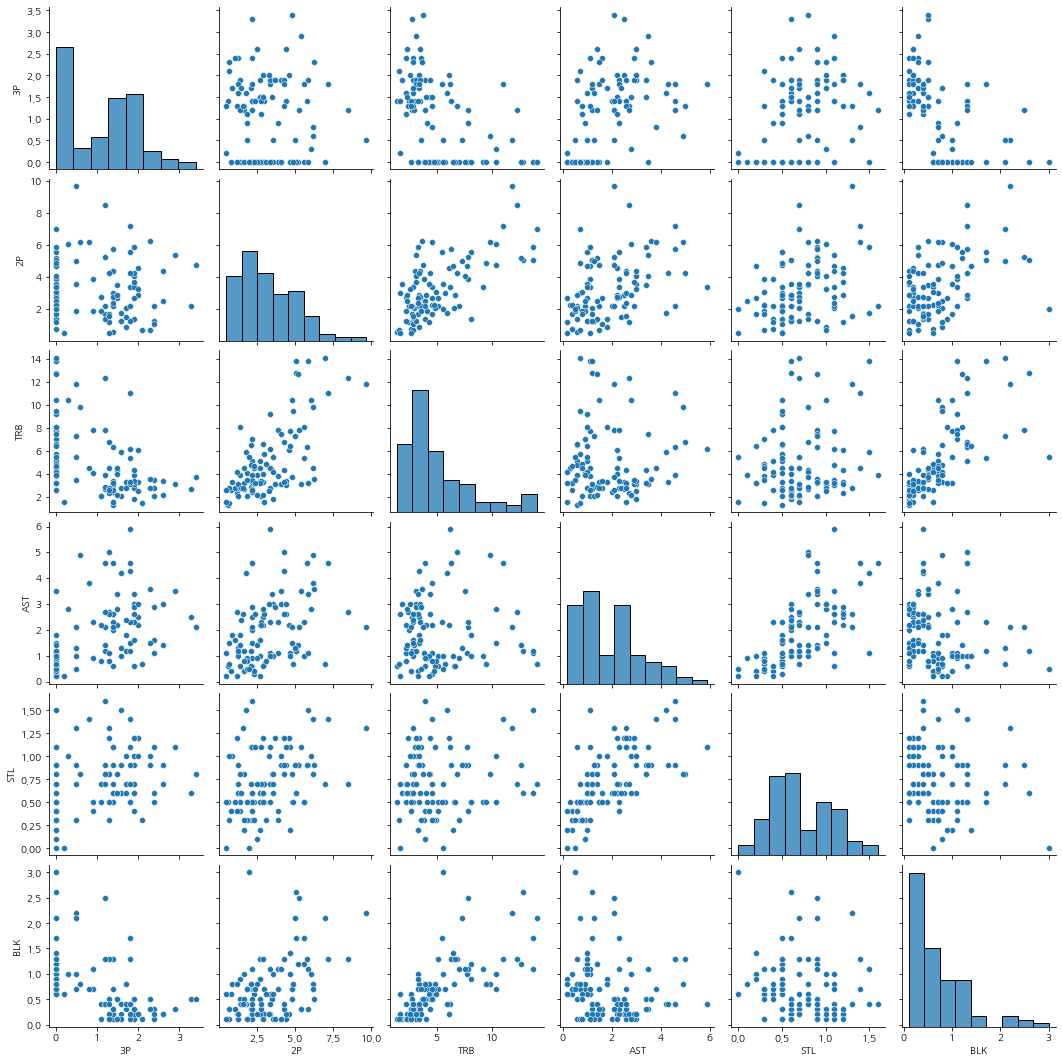

In [98]:
sns.pairplot(stat.iloc[:, 2:])

In [ ]:
stat.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [128]:
stat['Pos'] = pd.Categorical(stat['Pos'])
stat['Pos'] = stat['Pos'].cat.codes
stat.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,1,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,0,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,0,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,0,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,1,1.5,3.5,4.3,3.4,0.8,0.5


#### 데이터 나누기

In [129]:
data = stat.iloc[:, 1:7]
target = stat.Pos

In [130]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size=0.3, stratify = target, random_state=2111121625)

#### 교차검증 후 최적 K 산출

In [ ]:
score = []
for k in range(1, 15+1):
    knc = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knc, data, target, cv=7, scoring='accuracy')
    scores.append(score.mean())

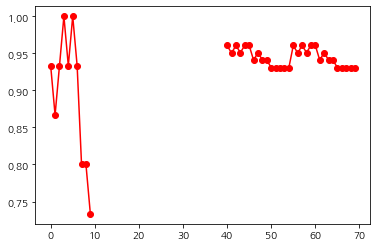

In [132]:
plt.plot(scores, 'ro-')

In [133]:
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(Xtrain, ytrain)
pred = knc.predict(Xtest)
knc.score(Xtrain, ytrain), accuracy_score(pred,ytest)

/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


(0.9714285714285714, 0.9333333333333333)

#### 컬럼 축소를 위한 시각화
+ 스틸/2점슛

/opt/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='STL', ylabel='2P'>

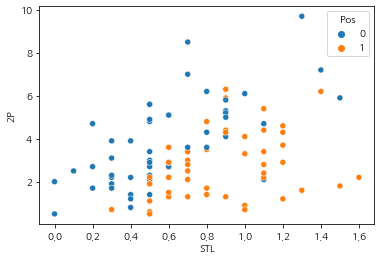

In [134]:
sns.scatterplot('STL', '2P', data=stat, hue='Pos')

#### 어시스트/2점슛

<AxesSubplot:xlabel='AST', ylabel='2P'>

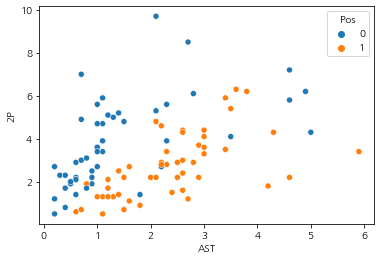

In [136]:
sns.scatterplot(x='AST', y='2P', data=stat, hue='Pos')

#### 슈팅가드와 센터를 구분지을 경계 불명확

<AxesSubplot:xlabel='BLK', ylabel='3P'>

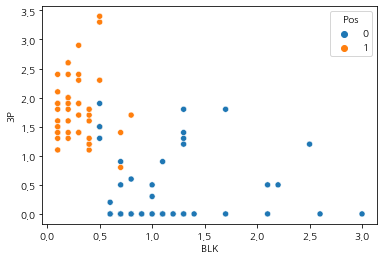

In [137]:
sns.scatterplot(x='BLK', y='3P', data=stat, hue='Pos')

<AxesSubplot:xlabel='TRB', ylabel='3P'>

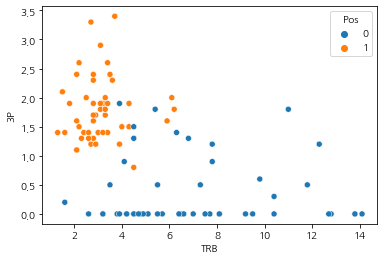

In [138]:
sns.scatterplot(x='TRB', y='3P', data=stat, hue='Pos')

<AxesSubplot:xlabel='AST', ylabel='3P'>

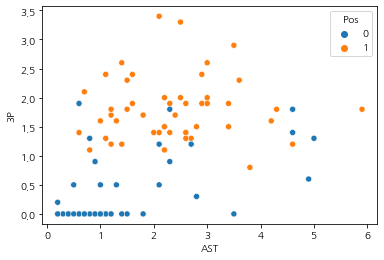

In [140]:
sns.scatterplot(x='AST', y='3P', data=stat, hue='Pos')

<AxesSubplot:xlabel='BLK', ylabel='2P'>

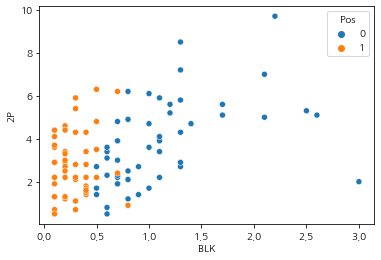

In [141]:
sns.scatterplot(x='BLK', y='2P', data=stat, hue='Pos')

#### 따라서 3점슛, 블로킹, 리바운드 정도가 중요한 요소

In [159]:
data = stat.iloc[:, [2,4,7]]
target = stat.Pos

#### 레이블인코딩의 또 다른 방법

In [ ]:
target = target.amp({'C':0, 'SG':1}) # numpy array에만 쓸 수 있음

In [161]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size=0.3, stratify = target, random_state=2111121705)

In [ ]:
score = []
for k in range(1, 15+1):
    knc = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knc, data, target, cv=7, scoring='accuracy')
    scores.append(score.mean())

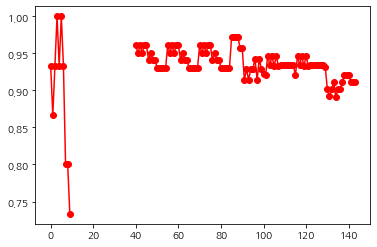

In [163]:
plt.plot(scores, 'ro-')

In [166]:
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(Xtrain, ytrain)
pred = knc.predict(Xtest)
knc.score(Xtrain, ytrain), accuracy_score(pred,ytest)

/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


(0.9285714285714286, 0.9)

#### 제대로 된 분석을 위해서는 각 변수에 대해 표준화 작업이 필요할 수 있음
+ 거리 측정 알고리즘 : 유클리드, 민코프스키, 맨해튼 

#### 신용카드 사기 판별 분석
+ kaggle에서 주최한 데이터분석 대회에서 사용한 데이터

In [167]:
card = pd.read_csv('data/creditcard.csv')

In [168]:
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [169]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
card.tail(30)

In [184]:
data = card.iloc[:, 0:30]
target = card.iloc[:, 30:]

In [185]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, train_size=0.3, stratify = target, random_state=211121750)

In [183]:
card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [187]:
from sklearn.tree import DecisionTreeClassifier

In [188]:
dtclf = DecisionTreeClassifier(criterion = 'entropy')
dtclf.fit(Xtrain,ytrain)
pred = dtclf.predict(Xtest)

In [189]:
accuracy_score(ytest, pred)

0.999102149324104

In [198]:
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(Xtrain,ytrain)
dtc.score(data, target)

1.0

In [200]:
from sklearn.linear_model import LogisticRegression

In [201]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(Xtrain,ytrain)
pred = lr.predict(Xtest)

/opt/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [202]:
from sklearn.naive_bayes import BernoulliNB

In [204]:
bayes = BernoulliNB()
bayes.fit(data,target)
bayes.score(data, target)

/opt/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9991467906336572